# Tutorial: ECT for Embedded Graphs

This tutorial demonstrates how to use the `ect` package to compute the Euler Characteristic Transform (ECT) for embedded graphs.

**Note**: This tutorial uses `EmbeddedGraph`, which is now an alias for the unified `EmbeddedComplex` class. All functionality shown here works identically, but `EmbeddedComplex` offers additional features like arbitrary dimensional cells. See the `Tutorial-EmbeddedComplex.ipynb` for the full capabilities.

In [1]:
from ect import ECT, EmbeddedGraph

import numpy as np


## Basic Usage

First, let's create a simple graph. The `EmbeddedGraph` class (now unified with `EmbeddedComplex`) allows you to create graphs with vertices embedded in Euclidean space.

<Axes: >

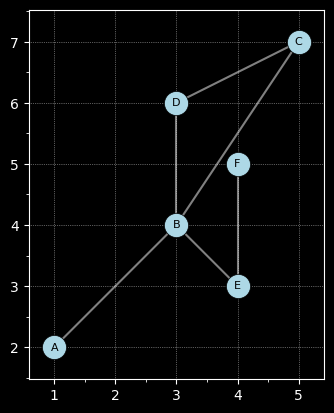

In [2]:
# Construct an example graph
# Note that this is the same graph that is returned by:
# G = create_example_graph()

G = EmbeddedGraph()

G.add_node("A", [1, 2])
G.add_node("B", [3, 4])
G.add_node("C", [5, 7])
G.add_node("D", [3, 6])
G.add_node("E", [4, 3])
G.add_node("F", [4, 5])

G.add_edge("A", "B")
G.add_edge("B", "C")
G.add_edge("B", "D")
G.add_edge("B", "E")
G.add_edge("C", "D")
G.add_edge("E", "F")

G.plot()

The embedded graph class inherits from the networkx graph class with additional attributes for spatial embedding. The unified `EmbeddedComplex` class provides:\n\n- `coord_matrix`: N×D matrix of vertex coordinates\n- `node_list`: Ordered list of vertex identifiers  \n- `cells`: Dictionary storing k-cells by dimension (new feature)\n\nThe coordinates of all vertices can be accessed using the `coord_matrix` attribute.

In [3]:
G.coord_matrix


array([[1., 2.],
       [3., 4.],
       [5., 7.],
       [3., 6.],
       [4., 3.],
       [4., 5.]])

 It's often useful to center the graph, so you can use the `center_coordinates` method shift the graph to have the average of the vertex coordinates be 0. Note that this does overwrite the coordinates of the points.

[[-2.33333333 -2.5       ]
 [-0.33333333 -0.5       ]
 [ 1.66666667  2.5       ]
 [-0.33333333  1.5       ]
 [ 0.66666667 -1.5       ]
 [ 0.66666667  0.5       ]]


<Axes: >

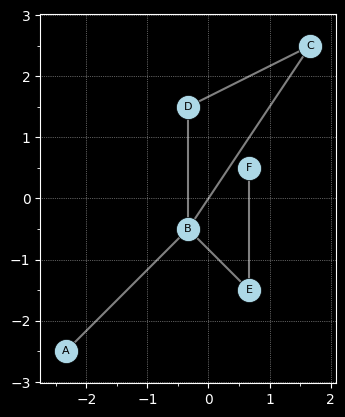

In [4]:
G.center_coordinates(center_type="mean")
print(G.coord_matrix)
G.plot()

 To get a bounding radius we can use the `get_bounding_radius` method.

The radius of bounding circle centered at the origin is 3.2015621187164243


<Axes: >

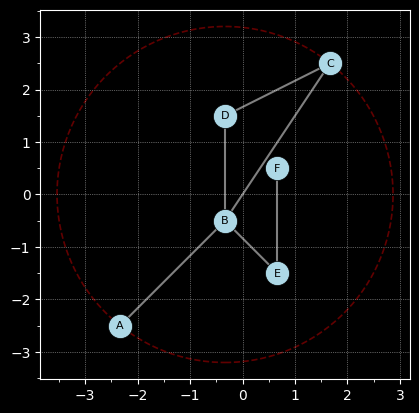

In [5]:
# This is actually getting the radius
r = G.get_bounding_radius()
print(f"The radius of bounding circle centered at the origin is {r}")

# plotting the graph with it's bounding circle of radius r.
G.plot(bounding_circle=True)



 We can also rescale our graph to have unit radius using `scale_coordinates`

The radius of bounding circle centered at the origin is 1.0


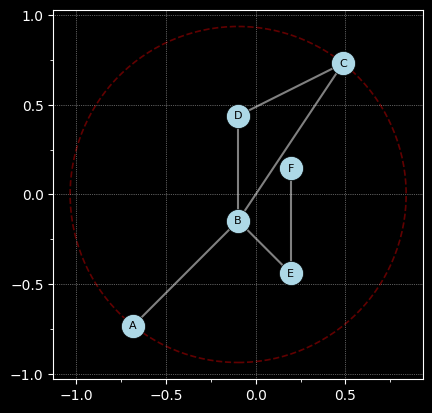

In [7]:
G.scale_coordinates(radius=1)
G.plot(bounding_circle=True)

r = G.get_bounding_radius(center_type="origin")
print(f"The radius of bounding circle centered at the origin is {r}")



In [ ]:
myect = ECT(num_dirs=16, num_thresh=20)

# The ECT object will automatically create directions when needed
print(f"Number of directions: {myect.num_dirs}")
print(f"Number of thresholds: {myect.num_thresh}")


 We can override the bounding radius as follows. Note that some methods will automatically use the bounding radius of the input `G` if not already set. I'm choosing the radius to be a bit bigger than the bounding radius of `G` to make some better pictures.

In [ ]:
custom_bound_radius = 1.2 * G.get_bounding_radius()
result = myect.calculate(G, override_bound_radius=custom_bound_radius)

print(f"Thresholds chosen are: {myect.thresholds}")


 If we want the Euler characteristic curve for a fixed direction, we use the `calculate` function with a specific angle. This returns an ECTResult object containing the computed values.

In [ ]:
result = myect.calculate(G, theta=np.pi / 2)
print(f"ECT values for direction pi/2: {result[0]}")


 To calculate the full ECT, we call the `calculate` method without specifying theta. The result returns the ECT matrix and associated metadata.

In [ ]:
result = myect.calculate(G)

print(f"ECT matrix shape: {result.shape}")
print(f"Number of directions: {myect.num_dirs}")
print(f"Number of thresholds: {myect.num_thresh}")

# We can plot the result matrix
result.plot()

 ## SECT



 The Smooth Euler Characteristic Transform (SECT) can be calculated from the ECT. Fix a radius $R$ bounding the graph. The average ECT in a direction $\omega$ defined on function values $[-R,R]$ is given by

 $$\overline{\text{ECT}_\omega} = \frac{1}{2R} \int_{t = -R}^{R} \chi(g_\omega^{-1}(-\infty,t]) \; dt. $$

 Then the SECT is defined by

 $$

 \begin{matrix}

 \text{SECT}(G): & \mathbb{S}^1 & \to & \text{Func}(\mathbb{R}, \mathbb{Z})\\

 & \omega & \mapsto & \{ t \mapsto \int_{-R}^t \left( \chi(g_\omega^{-1}(-\infty,a]) -\overline{\text{ECT}_\omega}\right)\:da \}

 \end{matrix}

 $$

 The SECT can be computed from the ECT result:

In [ ]:
sect = result.smooth()

sect.plot()



 ## ECT for higher dimensions



 The `ECT` class can also be used for higher dimensional graphs.

In [ ]:

# generate a 3d graph
list_3d = [
    ("A", [0, 0, 0]),
    ("B", [1, 0, 0]),
    ("C", [0, 1, 0]),
    ("D", [1, 1, 0]),
    ("E", [0, 0, 1]),
    ("F", [1, 0, 1]),
    ("G", [0, 1, 1]),
    ("H", [1, 1, 1]),
]
graph_3d = EmbeddedGraph()
graph_3d.add_nodes_from(list_3d)

# add edges
graph_3d.add_edge("A", "B")
graph_3d.add_edge("B", "C")
graph_3d.add_edge("C", "D")
graph_3d.add_edge("D", "E")
graph_3d.add_edge("E", "F")
graph_3d.add_edge("F", "G")
graph_3d.add_edge("G", "H")
graph_3d.add_edge("H", "A")

# plot the graph
graph_3d.plot()



 lets center the graph

In [ ]:
graph_3d.center_coordinates(center_type="mean")
graph_3d.plot()


 Now we can compute the ECT of the 3d graph.

In [ ]:
ect_3d = ECT(num_dirs=16, num_thresh=20)
result_3d = ect_3d.calculate(graph_3d)
result_3d.plot()


 Note that the each of the directions are appended in a list for the ECT result, so we won't see the same periodic behavior as in the 2d case.

 ECT results inherit from ndarrays but they store the associated directions and thresholds.

In [ ]:
result_3d.directions.vectors


In [ ]:
result_3d.thresholds


 We can also define custom directions and thresholds for the ECT in case we need finer control. We use random sampling from the unit sphere for the directions and cosine sampling for the thresholds.

In [ ]:
from ect import Directions

directions = Directions.random(16, dim=3)
thresholds = np.cos(np.linspace(0, np.pi, 20))
ect_3d = ECT(directions=directions, thresholds=thresholds)
result_3d = ect_3d.calculate(graph_3d)
result_3d.plot()

In [ ]:
# another example sampling from the half sphere
sample_size = 100
theta = np.linspace(0, np.pi / 2, sample_size)  # Only go up to pi/2 for half sphere
phi = np.linspace(0, 2 * np.pi, sample_size)
theta, phi = np.meshgrid(theta, phi)

# Flatten the meshgrid arrays and create vectors
half_sphere_vectors = np.column_stack(
    [
        np.sin(theta.flatten()) * np.cos(phi.flatten()),
        np.sin(theta.flatten()) * np.sin(phi.flatten()),
        np.cos(theta.flatten()),
    ]
)

# Normalize the vectors
half_sphere_vectors = half_sphere_vectors / np.linalg.norm(
    half_sphere_vectors, axis=1, keepdims=True
)

directions = Directions.from_vectors(half_sphere_vectors)
print(f"Number of direction vectors: {len(directions)}")
ect_3d = ECT(directions=directions, num_thresh=20)  # Reduced number of thresholds
result_3d = ect_3d.calculate(graph_3d)
result_3d.plot()


## What's New: Unified EmbeddedComplex\n\nThis tutorial showed the graph functionality using `EmbeddedGraph`. The new unified `EmbeddedComplex` class provides all this functionality plus:\n\n- **Arbitrary dimensional cells**: Add 2-cells (faces), 3-cells (volumes), and higher\n- **Enhanced ECT computation**: Properly includes all cell dimensions in Euler characteristic\n- **Backward compatibility**: `EmbeddedGraph` is now an alias to `EmbeddedComplex`\n\n### Quick example with the same graph:\n\n```python\n# This graph can now also have faces!\nG.add_face(['A', 'B', 'C'])  # Add a 2-cell if vertices form a triangle\n\n# Or even higher dimensional cells\nG.add_cell(['A', 'B', 'C', 'D'], dim=3)  # 3-cell if you have 4 vertices\n```\n\nSee `Tutorial-EmbeddedComplex.ipynb` for comprehensive examples of these new capabilities!"